In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import math

plt.style.use('ggplot')

In [2]:
n = 1000
t0 = 0
t1 = 10

x = [np.random.normal() for _ in range(n)]
t = np.linspace(t0, t1, n)

x_u = [np.random.uniform(-1, 1) for _ in range(n)]

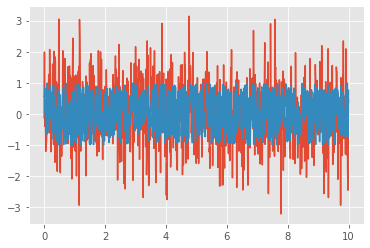

In [3]:
plt.plot(t, x)
plt.plot(t, x_u)

In [4]:
sigma = 1
alpha = 3
D = 0.5

dt = (t1 - t0) / n

In [5]:
def get_R(D, alpha):
    def R(tau):
        return D * np.exp(-alpha * abs(tau)) * (1 + alpha * abs(tau))
    
    return R

def get_h(D, alpha, sigma):
    def h(tau):
        return np.exp(-alpha * tau) * tau * np.sqrt((2 * D * alpha**3)/ (math.pi / sigma**2))
    
    return h

In [6]:
h = get_h(D, alpha, sigma)

### белый шум ~ Uniform(-1,1)

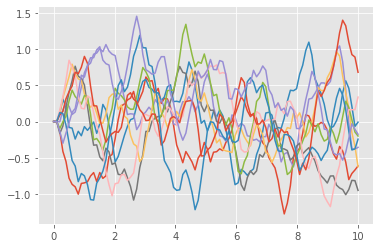

In [7]:
n = 100
t0 = 0
t1 = 10
dt = (t1 - t0) / n

ys = []

for q in range(10):
    if not q: t = np.linspace(t0, t1, n)
    x = [np.random.uniform(-1, 1) for _ in range(n)]
    y = [sum(h(t0 + dt * i) * x[j - i] for i in range(j)) for j in range(n)]
    
    ys.append(y)
    
    plt.plot(t, y)
    #plt.plot(t, x)

### визуализируем медианы по каждому срезу

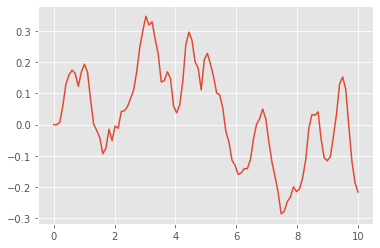

In [29]:
ys = np.array(ys)
mys = [np.mean(ys[:, i]) for i in range(n)]

_ = plt.plot(t, mys)

In [30]:
def get_slutsky_criteria(R, T, dt, n):
    return 2 * dt / T * sum((1 - k * dt / T) * R(k * dt) for k in range(n))

def plot_slutsky_criteria(dt, R):
    slutsky = []
    T_vals = list(range(5, 100, 4)) + list(range(100, 200, 7))
    
    for T in T_vals:
        slutsky.append(get_slutsky_criteria(R, T, 0.1, T * 10))
    
    return T_vals, slutsky

In [32]:
R = get_R(D, alpha)
T_vals, slutsky = plot_slutsky_criteria(dt, R)

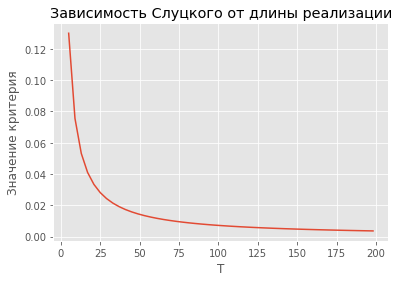

In [33]:
plt.title('Зависимость Слуцкого от длины реализации')
plt.ylabel('Значение критерия')
plt.xlabel('T')
plt.plot(T_vals, slutsky);

In [9]:
def emp_R(y, dt, n):
    r_vals = []
    for k in range(n):
        lim = n - k
        r_vals.append((1 / lim) * sum(y[i] * y[i + k] for i in range(lim)))
    
    return r_vals
  
def theor_R(R, dt, n):
    return [R(dt * i) for i in range(n)]

In [10]:
R = get_R(D, alpha)
emp_r = emp_R(y, dt, n)
th_R = theor_R(R, dt, n)

plt.xlim((t0, 10))
plt.plot(t, emp_r)
plt.plot(t, th_R)

In [11]:
np.mean(np.array(y)**2)

0.3360099840362221

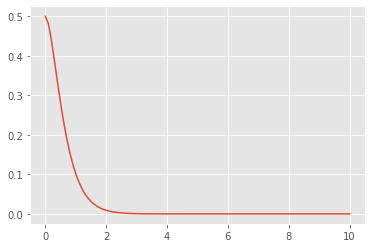

In [12]:
plt.plot(t, th_R)

In [13]:
def get_realization(n, h, dt, hlim=1e-20):
    x = [np.random.uniform(-1, 1) for _ in range(n)]
    y = []
    
    for j in range(n):
        cur_y = 0
        for i in range(j + 1):
            cur_val = h(dt * i) * x[j - i]
            
            if abs(cur_val) < hlim:
                break
            
            cur_y += cur_val
         
        y.append(cur_y)
    
    return y

def get_realizations(t0, t1, n, m, h):
    realizations = []
    t = np.linspace(t0, t1, n)

    for q in range(m):
        y = get_realization(n, h, dt)

        realizations.append(y)
    
    return t, realizations

In [14]:
def get_ergodic_exp(y, T, dt):
    return dt / T * sum(y)

def plot_ergodic(dt, h):
    my_erg = []
    T_vals = list(range(5, 100, 2)) + list(range(100, 200, 7)) + list(range(200, 2000, 400))
    
    for T in T_vals:
        big_t, realizations_big_t = get_realizations(0, T, T * 10, 1, h)
        my_erg.append(get_ergodic_exp(realizations_big_t[0], T, 0.1))
    
    return T_vals, my_erg

In [19]:
T_vals, my_erg = plot_ergodic(dt, h)

In [20]:
for i in range(len(T_vals)):
    print('Матожидание случайного процесса при T = {:3}: {:.5}'.format(T_vals[i], my_erg[i]))

Матожидание случайного процесса при T =   5: 0.0
Матожидание случайного процесса при T =   7: 0.0
Матожидание случайного процесса при T =   9: 0.0
Матожидание случайного процесса при T =  11: 0.0
Матожидание случайного процесса при T =  13: 0.0
Матожидание случайного процесса при T =  15: 0.0
Матожидание случайного процесса при T =  17: 0.0
Матожидание случайного процесса при T =  19: 0.0
Матожидание случайного процесса при T =  21: 0.0
Матожидание случайного процесса при T =  23: 0.0
Матожидание случайного процесса при T =  25: 0.0
Матожидание случайного процесса при T =  27: 0.0
Матожидание случайного процесса при T =  29: 0.0
Матожидание случайного процесса при T =  31: 0.0
Матожидание случайного процесса при T =  33: 0.0
Матожидание случайного процесса при T =  35: 0.0
Матожидание случайного процесса при T =  37: 0.0
Матожидание случайного процесса при T =  39: 0.0
Матожидание случайного процесса при T =  41: 0.0
Матожидание случайного процесса при T =  43: 0.0
Матожидание случайно

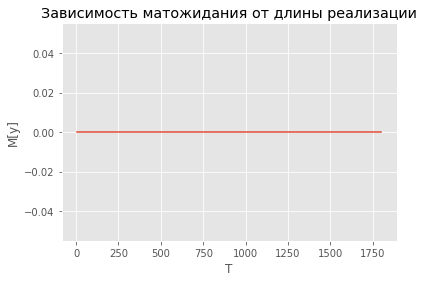

In [21]:
plt.title('Зависимость матожидания от длины реализации')
plt.ylabel('M[y]')
plt.xlabel('T')
plt.plot(T_vals, my_erg);

In [22]:
def get_ergodic_disp(y, T, dt):
    my = get_ergodic_exp(y, T, dt)
    return dt / T * np.sum((np.array(y) - my)**2)

def plot_ergodic_disp(dt, h):
    my_erg = []
    T_vals = list(range(5, 100, 2)) + list(range(100, 200, 7)) + list(range(200, 2000, 400))
    
    for T in T_vals:
        big_t, realizations_big_t = get_realizations(0, T, T * 10, 1, h)
        my_erg.append(get_ergodic_disp(realizations_big_t[0], T, 0.1))
    
    return T_vals, my_erg

In [23]:
T_vals, my_erg = plot_ergodic_disp(dt, h)

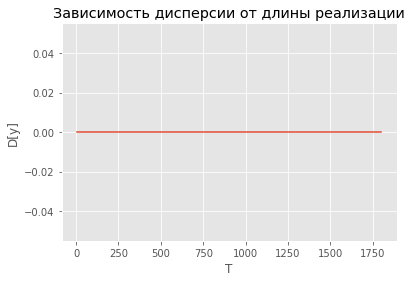

In [24]:
plt.title('Зависимость дисперсии от длины реализации')
plt.ylabel('D[y]')
plt.xlabel('T')
plt.plot(T_vals, my_erg);

In [26]:
#from statlib.metrics import expectation, dispersion, get_exp_interval
import scipy

def expectation(z):
    return sum(z) / len(z)


def dispersion(z):
    mx = expectation(z)
    return sum((z - mx) ** 2) / (len(z) - 1)


def get_exp_interval(s, val, n):
    return s * scipy.stats.norm.ppf(val) / np.sqrt(n)


def get_expectaion_intervals(realizations, n, prob):
    realizations = np.array(realizations)
    my_l = []
    my_r = []
    mys = []
    
    for i in range(n):
        y_ti = realizations[:, i]
        my = expectation(y_ti)
        σ = math.sqrt(dispersion(y_ti))
        
        my_exp_len = get_exp_interval(σ, prob, len(y_ti))
        
        mys.append(my)
        my_l.append(my - my_exp_len)
        my_r.append(my + my_exp_len)
    
    return mys, my_l, my_r

In [28]:
t, realizations = get_realizations(t0, t1, n, m, h)

prob = 0.95
mys, my_l, my_r = get_expectaion_intervals(realizations, n, prob)

plt.title('Доверительные интервалы для матожидания в дискретные моменты времени при доверительной вероятности {}'.format(prob))
plt.fill_between(t, mys, my_r, label='Верхняя оценка')
plt.plot(t, mys, color='black', label='m')
plt.fill_between(t, mys, my_l, label='Нижняя оценка')
plt.legend();

NameError: name 'm' is not defined

In [17]:
from criteria import StationarityTests

In [18]:
x = [np.random.normal() for _ in range(n)]
y = [sum(h(t0 + dt * i) * x[j - i] for i in range(100)) for j in range(n)]

sTest = StationarityTests()
sTest.ADF_Stationarity_Test(y)
if sTest.isStationary:
    print('y is stationary')
print('\n')
sTest.ADF_Stationarity_Test(x)
if sTest.isStationary:
    print('x is stationary')


Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -3.888959
P-Value                  0.002118
# Lags Used              1.000000
# Observations Used     98.000000
Critical Value (1%)     -3.498910
Critical Value (5%)     -2.891516
Critical Value (10%)    -2.582760
dtype: float64
y is stationary


Augmented Dickey-Fuller Test Results:
ADF Test Statistic     -8.857371e+00
P-Value                 1.515083e-14
# Lags Used             0.000000e+00
# Observations Used     9.900000e+01
Critical Value (1%)    -3.498198e+00
Critical Value (5%)    -2.891208e+00
Critical Value (10%)   -2.582596e+00
dtype: float64
x is stationary
